# 추측통계의 기본

## 모집단과 표본

- 모집단 : 추측하고 싶은 관측 대상 전체
- 표본 : 추측에 사용하는 관측대상의 일부
- 표본추출 (sampling) : 모집단에서 표본을 골라내는 일
- 표본 크기 (sample size) : 표본의 수
- 표본통계량 : 표본을 바탕으로 계산한 평균과 분산, 상관계수

#### 표본평균 : 모평균의 추정량
#### 추정값 : 표본의 데이터를 이용하여 계산한 결과

### 표본의 추출방법

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [5]:
df = pd.read_csv('python_stat_sample-master/data/ch4_scores400.csv')
scores = np.array(df['score'])
scores.shape, scores[:10]

((400,), array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64))

### 랜덤 추출
### ```np.random.choice(data, n, replace, p)``` : data에서 n개를 랜덤추출
- ```replace``` : True = 복원추출 (default) / False = 비복원추출
- ```p``` : **추출에 적용할 확률분포**

In [6]:
np.random.choice([1, 2, 3], 3)

array([1, 1, 2])

In [8]:
np.random.choice([1, 2, 3], 3, replace = False)

array([3, 1, 2])

In [9]:
np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

#### n = 20의 표본평균

In [16]:
np.random.seed(0)
sample = np.random.choice(scores, 20, replace = False)
sample.mean()

68.600

#### 모평균

In [13]:
scores.mean()

69.530

#### 랜덤 추출 반복

In [15]:
for i in range(5):
    sample = np.random.choice(scores, 20, replace = False)
    print(f'{i + 1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 66.05
2번째 무작위 추출로 얻은 표본평균 77.75
3번째 무작위 추출로 얻은 표본평균 70.95
4번째 무작위 추출로 얻은 표본평균 75.95
5번째 무작위 추출로 얻은 표본평균 68.95


### 
## 확률 모델

### 확률의 기본
- 확률변수 : 결과를 맞힐 수는 없지만, 취하는 값과 그 값이 나올 확률이 결정되어 있는 것
(예 : 주사위의 눈은 1부터 6까지)

- 시행 : 확률변수의 결과를 관측
(예 : 주사위 한번 굴림)
- 관측값 : 시행에 의해 관측되는 값

- 사건 (event) : 시행 결과로 나타날 수 있는 일
(예 : '관측값이 1', '관측값이 홀수')
- 근원사건 : 세부적으로 분해할 수 없는 사건
(예 : '관측값이 1')


- 주사위의 눈을 확률변수 X라 가정, '관측값이 1'이 되는 사건의 확률

### $P(X = 1) = {1 \over 6}$

- '관측값이 홀수'라는 사건의 확률

### $P(X = 1) + P(X = 3) + P(X = 5) = {1 \over 6} + {1 \over 6} + {1 \over 6} = {1 \over 2} $

### 상호배반 : 각 사건이 동시에 발생할 수 없음

### 
### 확률분포 : 확률변수의 변동을 나타냄

- 주사위의 확률분포

| **눈** | **1** | **2** | **3** | **4** | **5** | **6** |
| -- | -- | -- | -- | -- | -- | -- |
| 확률 | 1 / 6 | 1 / 6 | 1 / 6 | 1 / 6 | 1 / 6 | 1 / 6 |

- 불공정한 주사위의 확률분포

| **눈** | **1** | **2** | **3** | **4** | **5** | **6** |
| -- | -- | -- | -- | -- | -- | -- |
| 확률 | 1 / 21 | 2 / 21 | 3 / 21 | 4 / 21 | 5 / 21 | 6 / 21 |

In [17]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1 / 21, 2 / 21, 3 / 21, 4 / 21, 5 / 21, 6 / 21]

In [18]:
np.random.choice(dice, p = prob)

6

#### 불공정한 주사위 100번 시행

In [19]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p = prob)
sample

array([5, 5, 5, 4, 2, 6, 3, 5, 3, 2, 6, 6, 6, 6, 6, 4, 2, 4, 3, 2, 2, 6,
       1, 6, 3, 2, 2, 5, 3, 4, 5, 6, 6, 3, 2, 2, 4, 3, 4, 5, 5, 3, 4, 3,
       6, 2, 5, 6, 6, 3, 4, 5, 3, 4, 3, 4, 1, 6, 2, 5, 4, 5, 6, 5, 1, 4,
       5, 5, 5, 3, 2, 4, 6, 3, 6, 5, 4, 6, 4, 6, 4, 6, 5, 5, 4, 6, 5, 3,
       3, 6, 6, 4, 5, 6, 4, 6, 5, 6, 6, 6])

### 
### 100번 시행결과의 도수분포표 작성

In [20]:
freq, _ = np.histogram(sample, bins = 6, range = (1, 7))

pd.DataFrame({'frequency' : freq,
              'relative frequency' : freq / num_trial},
              index = pd.Index(np.arange(1, 7), name = 'dice'))

,frequency,relative frequency
dice,,
1,3,0.03
2,12,0.12
3,16,0.16
4,19,0.19
5,22,0.22
6,28,0.28


### 100번 시행결과의 히스토그램 작성

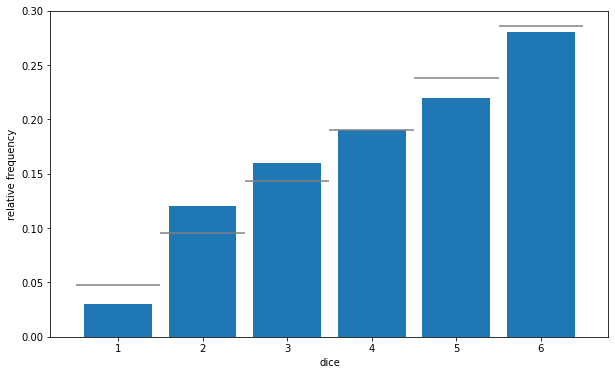

In [22]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample, bins = 6, range = (1, 7), 
        density = True, rwidth = 0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), 
          colors = 'gray') # 실제의 확률분포를 가로선으로 표시

ax.set_xticks(np.linspace(1.5, 6.5, 6)) # x축의 눈금 위치 설정
ax.set_xticklabels(np.arange(1, 7)) # x축의 눈금 값 설정

ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

### 10000번 시행결과의 히스토그램 작성
- **상대도수가 실제의 확률분포에 가까워짐**

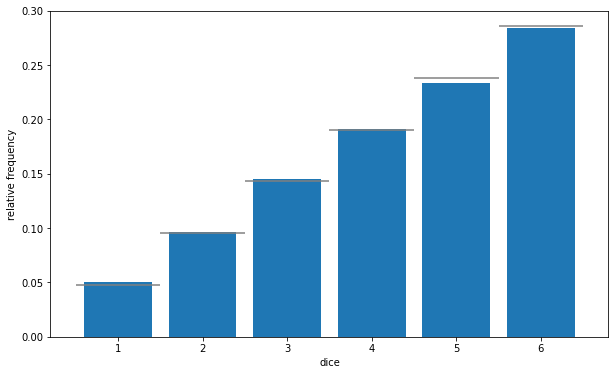

In [23]:
num_trial = 10000
sample = np.random.choice(dice, size = num_trial, p = prob)

fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample, bins = 6, range = (1, 7), 
        density = True, rwidth = 0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), 
          colors = 'gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))

ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')

plt.show()

### 
## 추측통계에서의 확률

In [28]:
scores.min(), scores.max()

(23, 100)

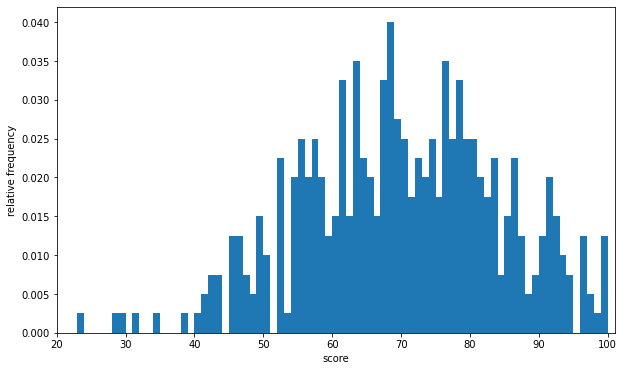

In [29]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(scores, bins = 100, range = (0, 100), 
        density = True)

ax.set_xlim(20, 101)
ax.set_ylim(0, 0.042)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

- 69값은 모집단의 0.04 (= 4%) => 따라서 랜덤 추출 수행시 4%확률로 69라는 표본을 얻게됨

#### 
#### 해당 데이터에서 10000번 랜덤 추출시의 확률 분포

In [31]:
sample = np.random.choice(scores, 10000)

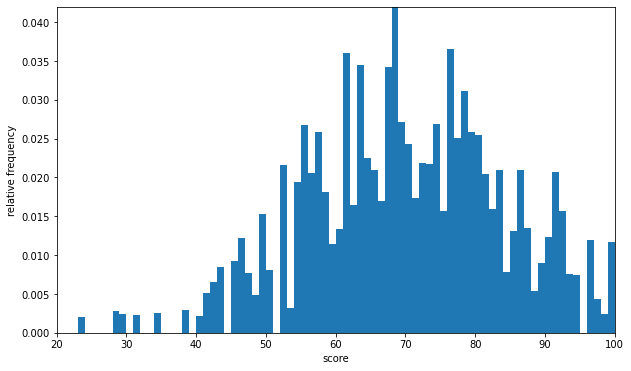

In [32]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample, bins = 100, range = (0, 100), 
        density = True)

ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()

- **시뮬레이션 횟수 (랜덤 추출 횟수, n)가 증가함에, 히스토그램이 실제 점수 분포에 유사해짐**
#### 

#### 표본 하나하나가 확률변수이므로, 표본평균도 확률변수
- **n = 20의 랜덤 추출이후, 표본평균을 계산하는 작업을 10000번 수행**

In [39]:
sample_means = [np.random.choice(scores, 20).mean() for _ in range(10000)]
np.mean(sample_means), scores.mean()

(69.521, 69.530)

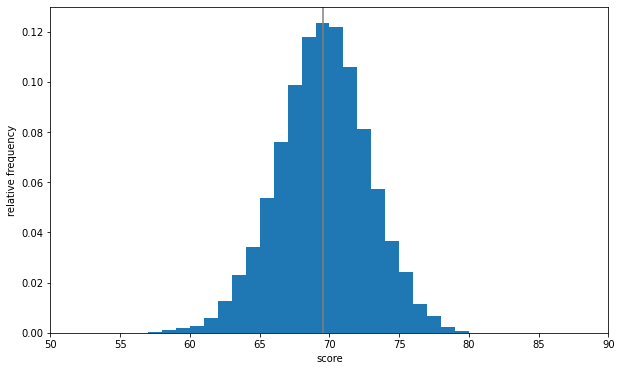

In [42]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

ax.hist(sample_means, bins = 100, range = (0, 100), 
        density = True)

ax.vlines(np.mean(scores), 0, 1, 'gray') # 모평균을 세로선으로 표시

ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)

ax.set_xlabel('score')
ax.set_ylabel('relative frequency')

plt.show()